In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle/

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 97% 416M/428M [00:02<00:00, 177MB/s]
100% 428M/428M [00:02<00:00, 157MB/s]


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [ ]:
paths =[]
labels = []
# _ fileholder for directory
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
      paths.append(os.path.join(dirname, filename))
      label = filename.split('_')[-1]
      label = label.split('.')[0]
      labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is loaded')

Dataset is loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_name_ps.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_sub_ps.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_mop_ps.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_haze_ps.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_death_ps.wav']

In [ ]:
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

In [ ]:
#Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,ps
1,/content/tess toronto emotional speech set dat...,ps
2,/content/tess toronto emotional speech set dat...,ps
3,/content/tess toronto emotional speech set dat...,ps
4,/content/tess toronto emotional speech set dat...,ps


In [ ]:
df['label'].value_counts()

label
ps         400
disgust    400
neutral    400
angry      400
sad        400
happy      400
fear       400
Name: count, dtype: int64

In [ ]:
df['label_count'] = df['label'].value_counts()

In [ ]:
df.drop('label_count',axis = 1)

,speech,label
0,/content/tess toronto emotional speech set dat...,ps
1,/content/tess toronto emotional speech set dat...,ps
2,/content/tess toronto emotional speech set dat...,ps
3,/content/tess toronto emotional speech set dat...,ps
4,/content/tess toronto emotional speech set dat...,ps
...,...,...
2795,/content/tess toronto emotional speech set dat...,fear
2796,/content/tess toronto emotional speech set dat...,fear
2797,/content/tess toronto emotional speech set dat...,fear
2798,/content/tess toronto emotional speech set dat...,fear


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

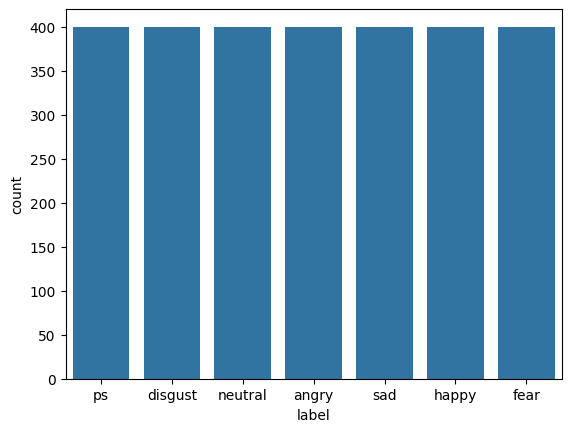

In [ ]:
sns.countplot(data=df,x='label')

In [ ]:
df

,speech,label,label_count
0,/content/tess toronto emotional speech set dat...,ps,NaN
1,/content/tess toronto emotional speech set dat...,ps,NaN
2,/content/tess toronto emotional speech set dat...,ps,NaN
3,/content/tess toronto emotional speech set dat...,ps,NaN
4,/content/tess toronto emotional speech set dat...,ps,NaN
...,...,...,...
2795,/content/tess toronto emotional speech set dat...,fear,NaN
2796,/content/tess toronto emotional speech set dat...,fear,NaN
2797,/content/tess toronto emotional speech set dat...,fear,NaN
2798,/content/tess toronto emotional speech set dat...,fear,NaN


In [ ]:
def waveplot(data, sr, emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.waveshow(data, sr=sr)
  plt.show()

In [ ]:
def spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


In [ ]:
df.drop('label_count', axis=1, inplace = True)

In [ ]:
df.head()
print(df['label'].unique())

['ps' 'disgust' 'neutral' 'angry' 'sad' 'happy' 'fear']


In [ ]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_name_ps.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_sub_ps.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_mop_ps.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_kick_fear.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_ring_fear.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_page_fear.wav'],
      dtype=object)

In [ ]:
emotion = 'fear'

In [ ]:
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

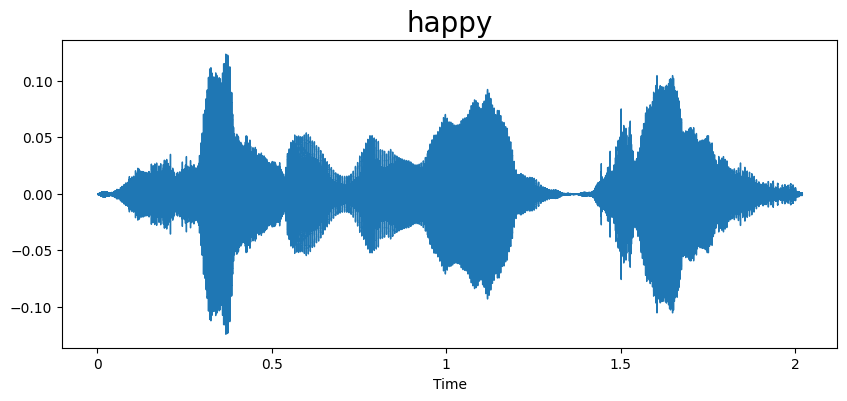

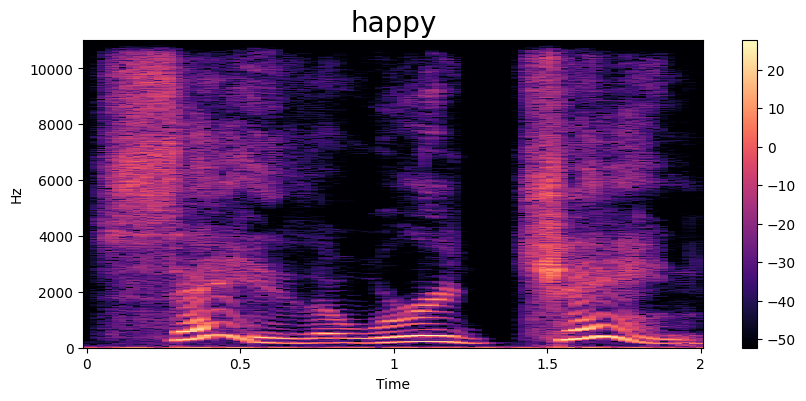

In [ ]:
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

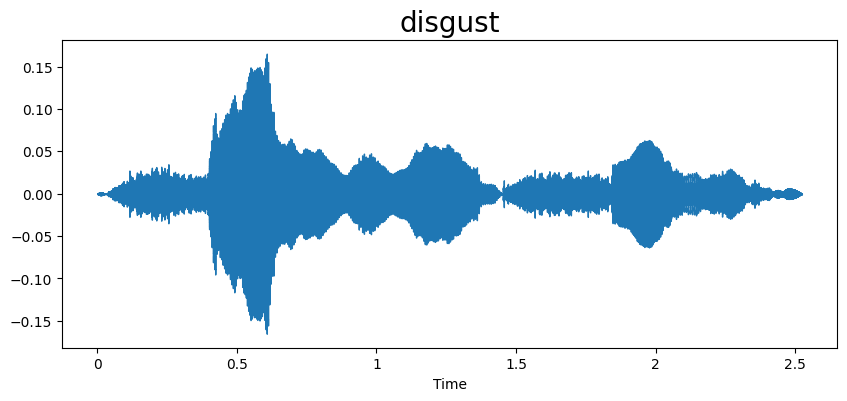

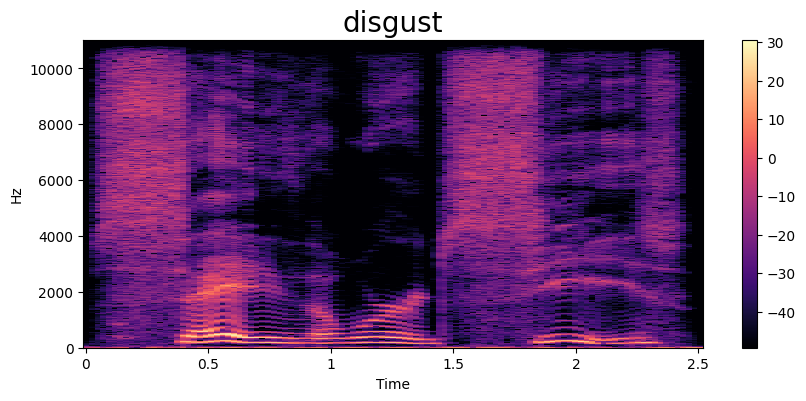

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

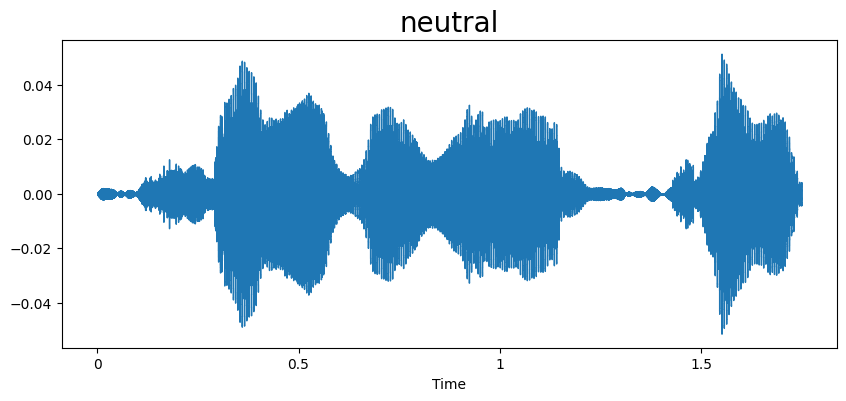

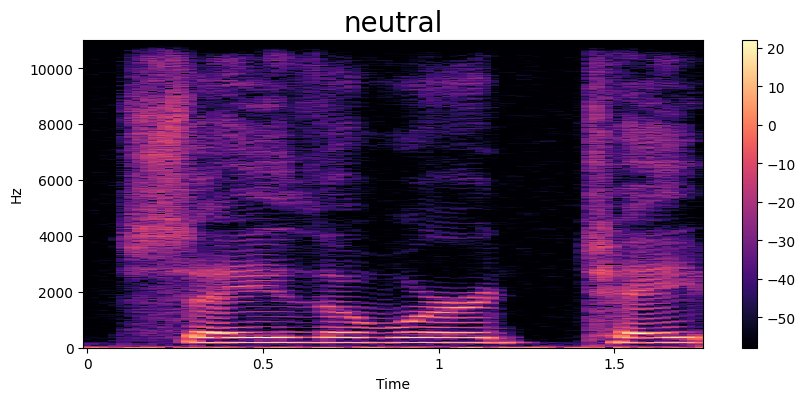

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

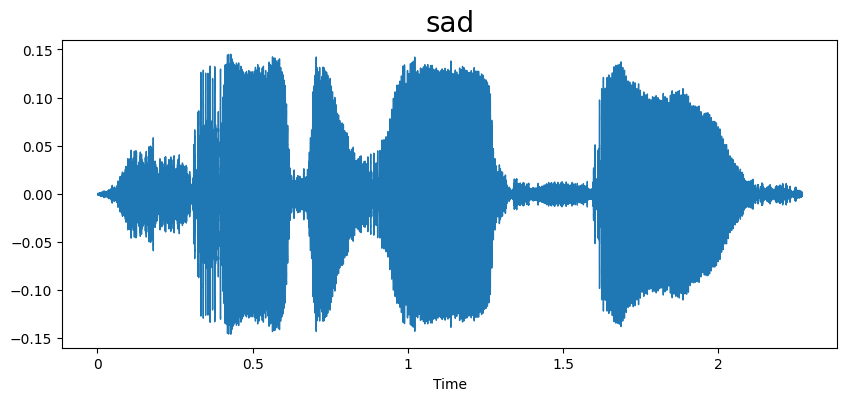

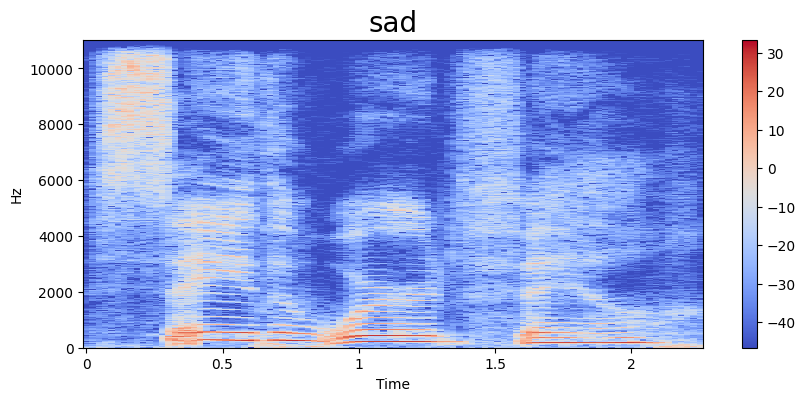

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

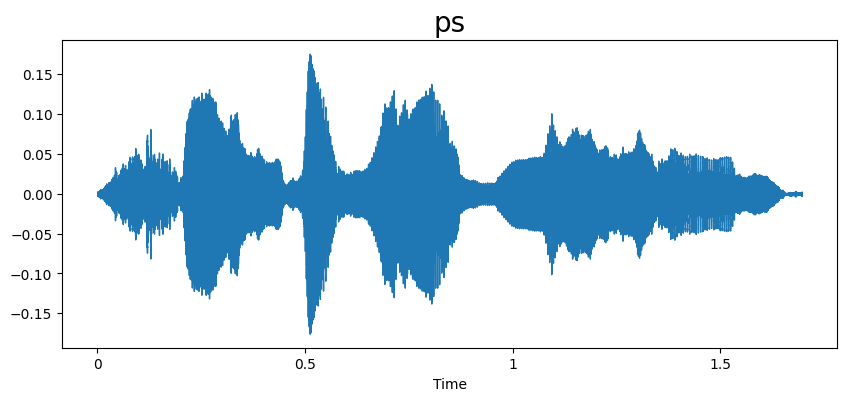

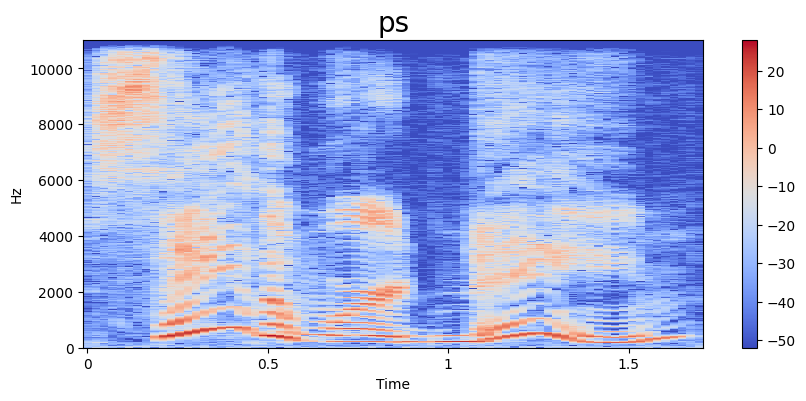

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

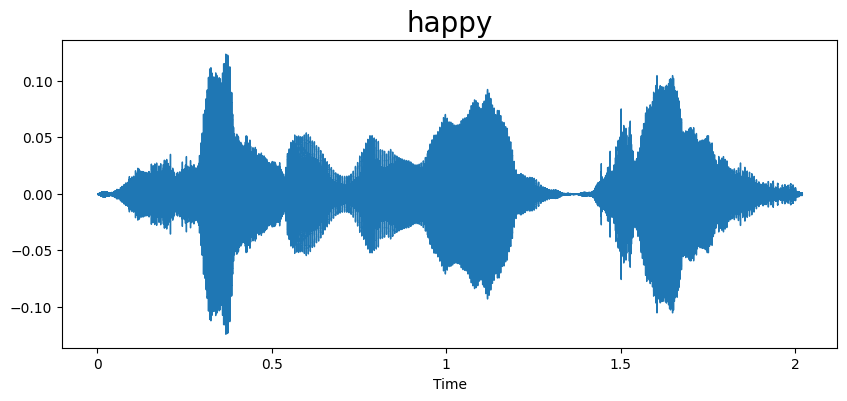

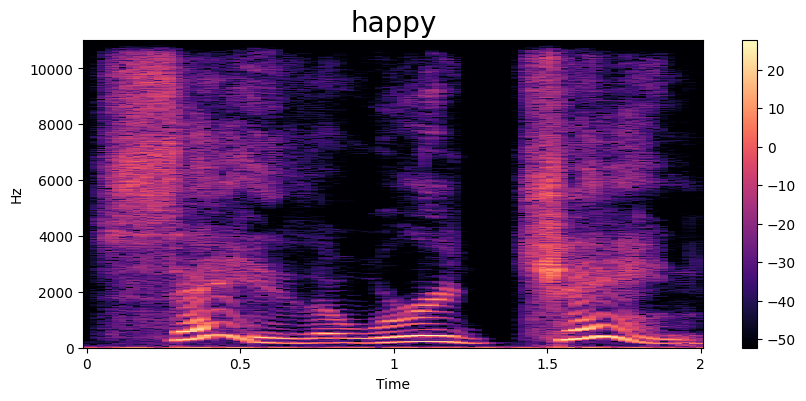

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Feature Extraction**

In [ ]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration=3, offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-375.57904   ,   82.77961   ,   -5.4110694 ,   26.476393  ,
        -16.85105   ,  -12.462346  ,   -1.8015746 ,  -25.670523  ,
         -9.679812  ,  -16.717962  ,  -17.548765  ,   -1.1783046 ,
        -15.90543   ,    4.316484  ,   -5.4861045 ,    3.9079306 ,
          7.145365  ,    3.3412223 ,   -1.1717029 ,    3.6826668 ,
         -5.662658  ,    5.3418913 ,   -8.311493  ,   -3.25902   ,
         -6.771278  ,   -4.159546  ,   -1.2986646 ,    4.6349535 ,
          5.976207  ,   11.0108595 ,    7.9254637 ,   13.763716  ,
         13.099888  ,    9.931681  ,    6.882424  ,    9.410168  ,
          7.964216  ,    6.7871737 ,    0.85248023,    2.0090938 ],
      dtype=float32)

In [ ]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
x_mfcc

0       [-375.57904, 82.77961, -5.4110694, 26.476393, ...
1       [-320.7292, 69.31872, -8.503275, -22.18039, -1...
2       [-369.28494, 92.90162, -19.354982, -10.243277,...
3       [-350.654, 47.585686, 2.8217607, 16.232906, -1...
4       [-363.3121, 60.044083, -24.32857, 1.2320602, -...
                              ...                        
2795    [-473.07642, 45.10684, 8.143567, 11.466564, 11...
2796    [-426.3825, 92.16118, 25.183935, -18.054258, -...
2797    [-450.67487, 60.81733, -6.9890566, 6.059538, 1...
2798    [-440.51578, 90.24859, 12.776612, -16.139324, ...
2799    [-472.0142, 63.13129, 10.757127, 3.4197447, 10...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in x_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
##input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()
y.shape

(2800, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

***Create the LSTM Model***

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),#rectifier linear unit
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
Model: "Sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
#train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64)

Epoch 1/30
35/35 [==============================] - 6s 41ms/step - loss: 1.7094 - accuracy: 0.3089 - val_loss: 1.0893 - val_accuracy: 0.5911
Epoch 2/30
35/35 [==============================] - 0s 9ms/step - loss: 1.1165 - accuracy: 0.5487 - val_loss: 0.7098 - val_accuracy: 0.7768
Epoch 3/30
35/35 [==============================] - 0s 7ms/step - loss: 0.8091 - accuracy: 0.6924 - val_loss: 0.4013 - val_accuracy: 0.8518
Epoch 4/30
35/35 [==============================] - 0s 7ms/step - loss: 0.5871 - accuracy: 0.7875 - val_loss: 0.2878 - val_accuracy: 0.9018
Epoch 5/30
35/35 [==============================] - 0s 7ms/step - loss: 0.4002 - accuracy: 0.8687 - val_loss: 0.1965 - val_accuracy: 0.9393
Epoch 6/30
35/35 [==============================] - 0s 7ms/step - loss: 0.2491 - accuracy: 0.9246 - val_loss: 0.1503 - val_accuracy: 0.9607
Epoch 7/30
35/35 [==============================] - 0s 8ms/step - loss: 0.2533 - accuracy: 0.9330 - val_loss: 0.1730 - val_accuracy: 0.9375
Epoch 8/30
35/35 [=

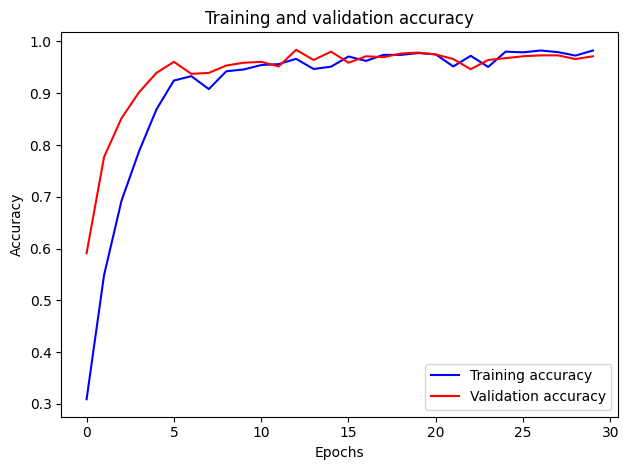

In [ ]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.tight_layout()
plt.legend()
plt.show()

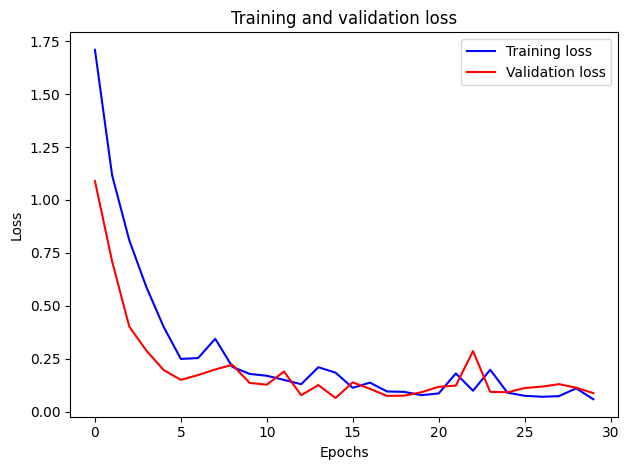

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

18/18 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

#print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[67  1  0  1  0  4  0]
 [ 0 72  0  0  0  1  3]
 [ 2  1 70  0  0  0  0]
 [ 1  0  0 75  0  1  0]
 [ 0  0  0  0 86  0  0]
 [ 0  1  0  0  0 88  0]
 [ 0  0  0  0  0  0 86]]


In [ ]:
#Print the classification report
target_names = ['angry','disgust','fear','happy','neutral','ps','sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

       angry       0.96      0.92      0.94        73
     disgust       0.96      0.95      0.95        76
        fear       1.00      0.96      0.98        73
       happy       0.99      0.97      0.98        77
     neutral       1.00      1.00      1.00        86
          ps       0.94      0.99      0.96        89
         sad       0.97      1.00      0.98        86

    accuracy                           0.97       560
   macro avg       0.97      0.97      0.97       560
weighted avg       0.97      0.97      0.97       560



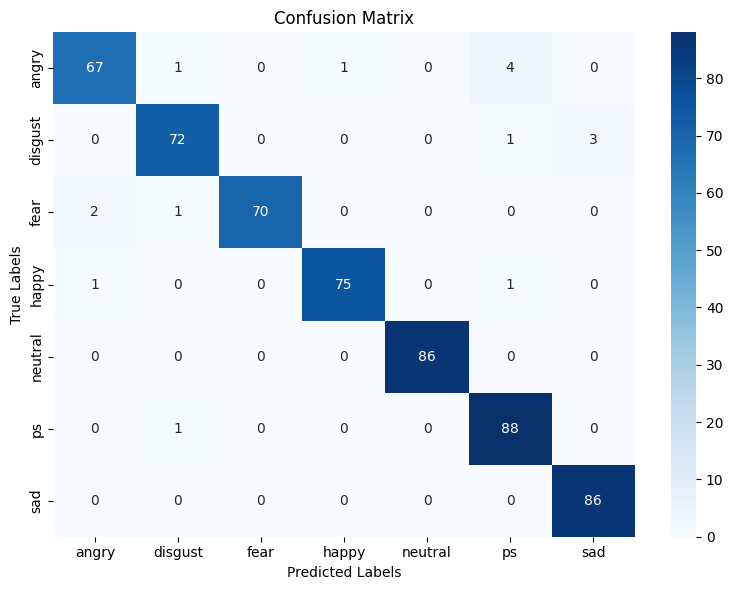

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()